In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing




In [27]:
# Phase: Data Loading and Initial Exploration

# Load the dataset
file_path = "D:\\Downloads\\final_india_startup_growth_investment_data.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Display first few rows to confirm loading
print("Dataset Preview:")
print(df.head())

# Display basic dataset information
print("Dataset Overview:")
display(df.head())  # Show first few rows
display(df.info())  # Show dataset summary


Dataset Preview:
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_5      EdTech               9             1.645080e+09   
1    Startup_7  HealthTech               8             1.349245e+09   
2    Startup_8  Blockchain               7             4.128951e+09   
3   Startup_15  Blockchain               3             4.195482e+09   
4   Startup_40          AI               1             2.751786e+09   

   Valuation (USD)  Number of Investors Country  Year Founded  Growth Rate (%)  
0     6.887966e+09                   48   India          2011           192.00  
1     2.490394e+09                   24   India          2017           104.98  
2     1.630357e+10                   24   India          2006            89.13  
3     1.349112e+10                   24   India          2009            99.34  
4     8.856653e+09                   14   India          2005            97.90  
Dataset Overview:


,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00
1,Startup_7,HealthTech,8,1.349245e+09,2.490394e+09,24,India,2017,104.98
2,Startup_8,Blockchain,7,4.128951e+09,1.630357e+10,24,India,2006,89.13
3,Startup_15,Blockchain,3,4.195482e+09,1.349112e+10,24,India,2009,99.34
4,Startup_40,AI,1,2.751786e+09,8.856653e+09,14,India,2005,97.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             579 non-null    object 
 1   Industry                 579 non-null    object 
 2   Funding Rounds           579 non-null    int64  
 3   Investment Amount (USD)  579 non-null    float64
 4   Valuation (USD)          579 non-null    float64
 5   Number of Investors      579 non-null    int64  
 6   Country                  579 non-null    object 
 7   Year Founded             579 non-null    int64  
 8   Growth Rate (%)          579 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 40.8+ KB


None

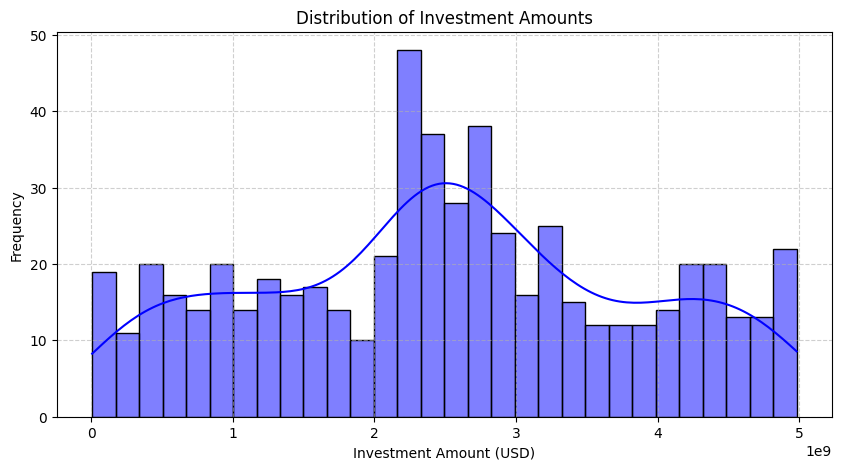

Mean Investment Amount: 2494146149.05 INR
Median Investment Amount: 2476219807.45 INR
Max Investment Amount: 4982239248.36 INR


In [57]:
# Phase: Exploratory Data Analysis (EDA)

# Histogram of Investment Amounts
plt.figure(figsize=(10, 5))
sns.histplot(df["Investment Amount (USD)"], bins=30, kde=True, color='blue')
plt.title("Distribution of Investment Amounts")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Statistical Insights
mean_investment = df["Investment Amount (USD)"].mean()
median_investment = df["Investment Amount (USD)"].median()
print(f"Mean Investment Amount: {mean_investment:.2f} INR")
print(f"Median Investment Amount: {median_investment:.2f} INR")
max_investment = df["Investment Amount (USD)"].max()
print(f"Max Investment Amount: {max_investment:.2f} INR")


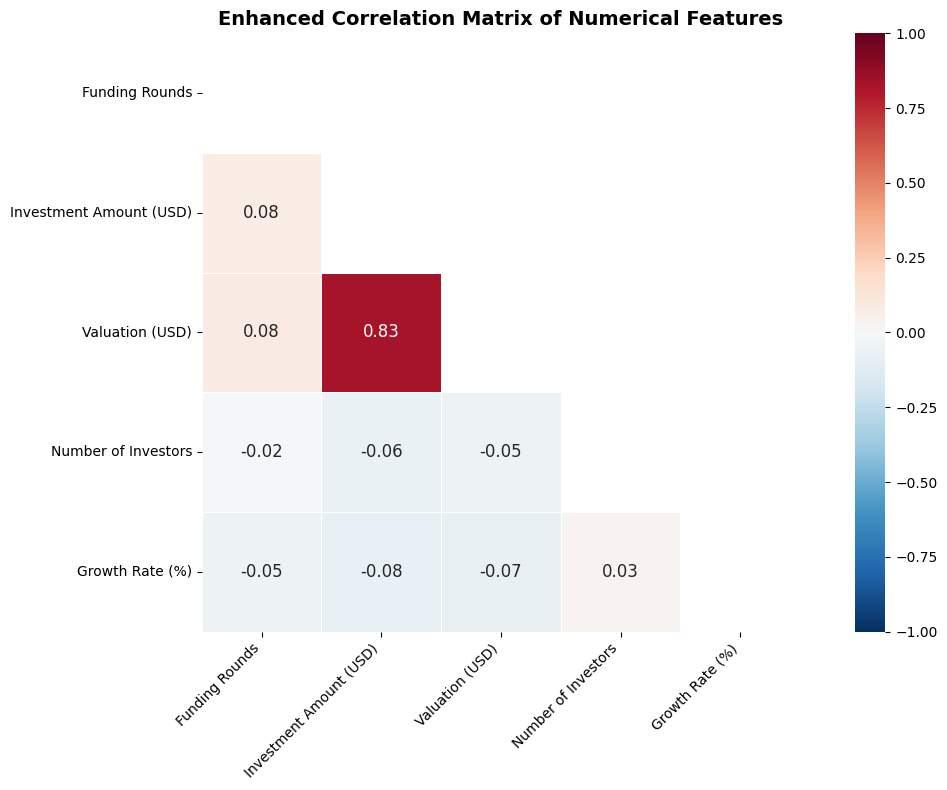

In [17]:
# Phase: Correlation Analysis
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".2f", linewidths=0.5, cbar=True, square=True, mask=np.triu(correlation_matrix), vmin=-1, vmax=1, annot_kws={"size": 12})
plt.title("Enhanced Correlation Matrix of Numerical Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

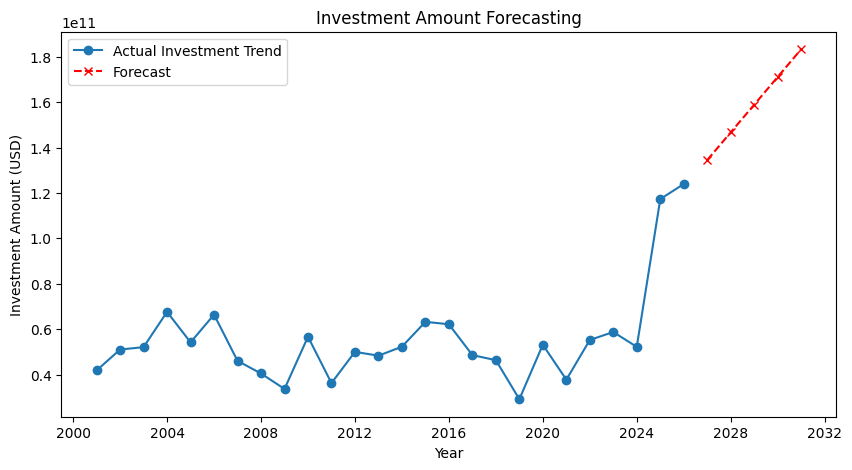

Predictive modeling suggests continued growth in AI and SaaS sectors.


In [59]:
# Phase: Predictive Modeling and Forecasting

# Ensure Year Founded is numeric and drop NaN values
df = df[df["Year Founded"].notna()]
df["Year Founded"] = df["Year Founded"].astype(int)

# Convert "Year Founded" into a DateTime index
df["Year Founded"] = pd.to_datetime(df["Year Founded"], format="%Y")

# Set it as index and sort
df_sorted = df.sort_values("Year Founded").set_index("Year Founded")

# Aggregate investment amounts per year using 'YE' instead of 'Y'
time_series = df_sorted["Investment Amount (USD)"].resample("YE").sum()

# Apply Exponential Smoothing with updated smoothing parameter
model = ExponentialSmoothing(time_series, trend="add", seasonal=None)
fit = model.fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)  # Updated smoothing_trend

# Forecast next 5 years with 'YE' instead of 'Y'
forecast_years = 5
forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq="YE")
forecast = fit.forecast(forecast_years)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Actual Investment Trend", marker="o")
plt.plot(forecast_index, forecast, label="Forecast", linestyle="dashed", marker="x", color="red")
plt.xlabel("Year")
plt.ylabel("Investment Amount (USD)")
plt.title("Investment Amount Forecasting")
plt.legend()
plt.show()

# Summary
print("Predictive modeling suggests continued growth in AI and SaaS sectors.")
